# Week 3 Day 4 Part 1, Graphs


## Question 0: Run this cell

RUN THE FOLLOWING CELL


In [1]:
%config InteractiveShell.ast_node_interactivity="none"
%pip install networkx
%pip install matplotlib
%pip install scipy
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from collections import deque


def f(globals, locals):
    import base64
    CODE = ("ZGVmIG1ha2VfcHJpbnRfbG9jYWxzKCk6IAogICAgIyBJbiBhIGZ1bmN0aW9uIHRvIHByZXZlbnQgbG9jYWxzIGFuZCBpbXBvcnRzIGZyb20gbGVha2luZy4KICAgIGdsb2JhbCBtYWtlX3ByaW50X2xvY2FscwogICAgZGVsIG1ha2VfcHJpbnRfbG9jYWxzICAjIE9ubHkgcnVuIHRoaXMgZnVuY3Rpb24gb25jZS4KCiAgICBpbXBvcnQgSVB5dGhvbgogICAgaW1wb3J0IGFzdAogICAgaW1wb3J0IGluc3BlY3QKCiAgICBjbGFzcyBWaXNpdG9yKGFzdC5Ob2RlVmlzaXRvcik6CiAgICAgICAgZGVmIF9faW5pdF9fKHNlbGYpOgogICAgICAgICAgICBzZWxmLnZhcmlhYmxlcyA9IHNldCgpCiAgICAgICAgZGVmIHZpc2l0X05hbWUoc2VsZiwgbmFtZSk6CiAgICAgICAgICAgIHNlbGYudmFyaWFibGVzLmFkZChuYW1lLmlkKQogICAgICAgICMgVE9ETzogUG9zc2libHkgZGV0ZWN0IHdoZXRoZXIgdmFyaWFibGVzIGFyZSBhc3NpZ25lZCB0by4KCiAgICBBTExPV19UWVBFUyA9IFtpbnQsIGZsb2F0LCBzdHIsIGJvb2wsIGxpc3QsIGRpY3QsIHR1cGxlLCByYW5nZV0KICAgIGRlZiBmaWx0ZXJfdmFyaWFibGVzKHZhcmlhYmxlcywgbG9jYWxzKToKICAgICAgICBmb3IgdiBpbiB2YXJpYWJsZXM6CiAgICAgICAgICAgIGlmIHYgaW4gbG9jYWxzIGFuZCB0eXBlKGxvY2Fsc1t2XSkgaW4gQUxMT1dfVFlQRVM6CiAgICAgICAgICAgICAgICB5aWVsZCB2CiAgCiAgICAjIFVuZm9ydHVuYXRlbHksIHRoZXJlIGRvZXNuJ3Qgc2VlbSB0byBiZSBhIHN1cHBvcnRlZCB3YXkgb2YgZ2V0dGluZwogICAgIyB0aGUgY3VycmVudCBjZWxsJ3MgY29kZSB2aWEgdGhlIHB1YmxpYyBJUHl0aG9uIEFQSXMuIEhvd2V2ZXIsIGJlY2F1c2UKICAgICMgd2UgYXJlIGdldHRpbmcgY2FsbGVkIGZyb20gSVB5dGhvbiBpdHNlbGYgYW5kIHdlIGFyZSBhbHJlYWR5IGluc3BlY3RpbmcKICAgICMgdGhlIHN0YWNrdHJhY2UsIHdlIG1pZ2h0IGFzIHdlbGwganVzdCBwZWVrIGludG8gaXRzIGZyYW1lLi4uCiAgICBpZiBJUHl0aG9uLl9fdmVyc2lvbl9fID09ICI1LjUuMCI6CiAgICAgICAgIyBjb2xhYgogICAgICAgIGRlZiBnZXRfYXN0KGZyYW1lKToKICAgICAgICAgICAgcmV0dXJuIGFzdC5Nb2R1bGUoZnJhbWUuZl9iYWNrLmZfYmFjay5mX2xvY2Fsc1sibm9kZWxpc3QiXSkKICAgICAgICBkZWYgZmluZF9sb2NhbHMoZnJhbWUpOgogICAgICAgICAgICByZXR1cm4gZnJhbWUuZl9sb2NhbHMKICAgICAgICBkZWYgYXRfdG9wX2xldmVsKGZyYW1lKToKICAgICAgICAgICAgcmV0dXJuIGZyYW1lLmZfYmFjay5mX2NvZGUuY29fZmlsZW5hbWUuZW5kc3dpdGgoIklQeXRob24vY29yZS9pbnRlcmFjdGl2ZXNoZWxsLnB5IikKCiAgICBlbGlmIElQeXRob24uX192ZXJzaW9uX18gPT0gIjguNC4wIjoKICAgICAgICAjIGxhYiBjb21wdXRlcnMKICAgICAgICBkZWYgZ2V0X2FzdChmcmFtZSk6CiAgICAgICAgICAgIHJldHVybiBhc3QuTW9kdWxlKGZyYW1lLmZfYmFjay5mX2JhY2suZl9sb2NhbHNbIm5vZGVsaXN0Il0pCiAgICAgICAgZGVmIGZpbmRfbG9jYWxzKGZyYW1lKToKICAgICAgICAgICAgcmV0dXJuIGZyYW1lLmZfbG9jYWxzCiAgICAgICAgZGVmIGF0X3RvcF9sZXZlbChmcmFtZSk6CiAgICAgICAgICAgIHJldHVybiBmcmFtZS5mX2JhY2suZl9jb2RlLmNvX2ZpbGVuYW1lLmVuZHN3aXRoKCJJUHl0aG9uL2NvcmUvaW50ZXJhY3RpdmVzaGVsbC5weSIpCiAgICBlbHNlOgogICAgICAgIHByaW50KGYicHJpbnRfbG9jYWxzKCkgbm90IHN1cHBvcnRlZCBvbiBJUHl0aG9uIHZlcnNpb24ge0lQeXRob24uX192ZXJzaW9uX199IikKCiAgICBkZWYgZ2V0X2NlbGxfbmFtZXMoZnJhbWUpOgogICAgICAgIHRyZWUgPSBnZXRfYXN0KGZyYW1lKQogICAgICAgIHZpc2l0b3IgPSBWaXNpdG9yKCkKICAgICAgICB2aXNpdG9yLnZpc2l0KHRyZWUpCiAgICAgICAgcmV0dXJuIGZpbHRlcl92YXJpYWJsZXModmlzaXRvci52YXJpYWJsZXMsIGZyYW1lLmZfbG9jYWxzKQoKICAgIGRlZiBmaW5kX3doaWNoKGZyYW1lKToKICAgICAgICAjIEZyYW1lIGlzIHRoZSBmcmFtZSB3aG9zZSBsb2NhbHMgd2UgYXJlIGludGVyZXN0ZWQgaW4gcHJpbnRpbmcuCiAgICAgICAgaWYgYXRfdG9wX2xldmVsKGZyYW1lKToKICAgICAgICAgICAgIyBUaGUgcGFyZW50IGZyYW1lIG9mIHRoZSBpbnRlcmVzdGVkIGZyYW1lIGlzIGEgbW9kdWxlLCBtb3N0IGxpa2VseQogICAgICAgICAgICAjICJpbnRlcmFjdGl2ZXNoZWxsIi4gVGhpcyBtZWFucyB3ZSBhcmUgaW4gdGhlIGdsb2JhbCBzY29wZSwgc2luY2UKICAgICAgICAgICAgIyBvbmx5IHRoZSBnbG9iYWwgc2NvcGUgc2hvdWxkIGJlIGRpcmVjdGx5IHJ1biBieSB0aGUgaW50ZXJhY3RpdmUgc2hlbGwuCiAgICAgICAgICAgIHJldHVybiBzZXQoZ2V0X2NlbGxfbmFtZXMoZnJhbWUpKQogICAgICAgICMgVGhlIHBhcmVudCBmcmFtZSBpcyBub3QgYSBtb2R1bGUsIHNvIHdlIGFyZSBpbiBhIGxvY2FsIHNjb3BlLgogICAgICAgIHJldHVybiBzZXQoZnJhbWUuZl9sb2NhbHMpCgogICAgZGVmIHByaW50X2xvY2Fscygqd2hpY2gsIHR5cGVzPUZhbHNlKToKICAgICAgICAiIiJQcmludCB0aGUgbG9jYWwgdmFyaWFibGVzIGluIHRoZSBjYWxsZXIncyBmcmFtZS4iIiIKICAgICAgICBpbXBvcnQgaW5zcGVjdAogICAgICAgICMgY3VycmVudGZyYW1lKCkgZnJhbWUgaXMgcHJpbnRfbG9jYWxzLiBXZSB3YW50IHRoZSBjYWxsZXIncyBmcmFtZQogICAgICAgIGZyYW1lID0gaW5zcGVjdC5jdXJyZW50ZnJhbWUoKS5mX2JhY2sKICAgICAgICBsb2NhbHMgPSBmaW5kX2xvY2FscyhmcmFtZSkKICAgICAgICB3aGljaCA9IHNldCh3aGljaCkgaWYgd2hpY2ggZWxzZSBmaW5kX3doaWNoKGZyYW1lKQogICAgICAgIGxsID0ge2s6IHYgZm9yIGssIHYgaW4gbG9jYWxzLml0ZW1zKCkgaWYgayBpbiB3aGljaH0KICAgICAgICBpZiBub3QgbGw6CiAgICAgICAgICAgIHByaW50KCJwcmludF9sb2NhbHM6IG5vIGxvY2FscyIpCiAgICAgICAgICAgIHJldHVybgogICAgICAgIGlmIHR5cGVzOgogICAgICAgICAgICBwcmludCgiXG4iLmpvaW4oZiJ7a306IHt0eXBlKHYpLl9fbmFtZV9ffSDihpAge3Z9IiBmb3IgaywgdiBpbiBsbC5pdGVtcygpKSkKICAgICAgICBlbHNlOgogICAgICAgICAgICBwcmludCgiOyAiLmpvaW4oZiJ7a30g4oaQIHtyZXByKHYpfSIgZm9yIGssIHYgaW4gbGwuaXRlbXMoKSkpCgogICAgcmV0dXJuIHByaW50X2xvY2FscwoKcHJpbnRfbG9jYWxzID0gbWFrZV9wcmludF9sb2NhbHMoKQ==", "ZGVmIG1ha2VfcHJldHR5X2Fzc2VydCgpOgogICAgaW1wb3J0IHN5cwogICAgaW1wb3J0IElQeXRob24KICAgIGltcG9ydCBhc3QKICAgIGltcG9ydCBpbnNwZWN0CiAgICBpbXBvcnQgaW8KICAgIGltcG9ydCBpdGVydG9vbHMKICAgIAogICAgZ2xvYmFsIG1ha2VfcHJldHR5X2Fzc2VydAogICAgZGVsIG1ha2VfcHJldHR5X2Fzc2VydAoKICAgIGlmIElQeXRob24uX192ZXJzaW9uX18gPT0gIjUuNS4wIjoKICAgICAgICAjIGNvbGFiIFRPRE8KICAgICAgICBkZWYgZ2V0X2Fzc2VydF9saW5lKGZyYW1lKToKICAgICAgICAgICAgcmV0dXJuIGZyYW1lLmZfYmFjay5mX2JhY2suZl9sb2NhbHNbIm5vZGUiXQogICAgICAgIGRlZiBhdF90b3BfbGV2ZWwoZnJhbWUpOgogICAgICAgICAgICBjb2RlID0gZnJhbWUuZl9iYWNrLmZfYmFjay5mX2NvZGUKICAgICAgICAgICAgcmV0dXJuIGNvZGUuY29fZmlsZW5hbWUuZW5kc3dpdGgoIklQeXRob24vY29yZS9pbnRlcmFjdGl2ZXNoZWxsLnB5IikKICAgICAgICBkZWYgY2FuX2Fubm90YXRlKGZyYW1lKToKICAgICAgICAgICAgcmV0dXJuIEZhbHNlCgogICAgZWxpZiBJUHl0aG9uLl9fdmVyc2lvbl9fID09ICI4LjQuMCI6CiAgICAgICAgIyBsYWIgY29tcHV0ZXJzCiAgICAgICAgZGVmIGdldF9hc3NlcnRfbGluZShmcmFtZSk6CiAgICAgICAgICAgIHJldHVybiBmcmFtZS5mX2JhY2suZl9iYWNrLmZfbG9jYWxzWyJub2RlIl0KICAgICAgICBkZWYgYXRfdG9wX2xldmVsKGZyYW1lKToKICAgICAgICAgICAgY29kZSA9IGZyYW1lLmZfYmFjay5mX2JhY2suZl9jb2RlCiAgICAgICAgICAgIHJldHVybiBjb2RlLmNvX2ZpbGVuYW1lLmVuZHN3aXRoKCJJUHl0aG9uL2NvcmUvaW50ZXJhY3RpdmVzaGVsbC5weSIpIGFuZCBjb2RlLmNvX25hbWUgPT0gInJ1bl9hc3Rfbm9kZXMiCiAgICAgICAgZGVmIGNhbl9hbm5vdGF0ZShmcmFtZSk6CiAgICAgICAgICAgIHJldHVybiBhdF90b3BfbGV2ZWwoZnJhbWUpIGFuZCBGYWxzZQoKICAgIGRlZiBpc19saXRlcmFsKGEpOgogICAgICAgIHRyeToKICAgICAgICAgICAgYXN0LmxpdGVyYWxfZXZhbChhKQogICAgICAgICAgICByZXR1cm4gVHJ1ZQogICAgICAgIGV4Y2VwdCBWYWx1ZUVycm9yOgogICAgICAgICAgICByZXR1cm4gRmFsc2UKICAgICAgICByZXR1cm4gRmFsc2UKCgogICAgZGVmIGFubm90YXRlX2NhbGwoZnJhbWUpOgogICAgICAgIGlmIG5vdCBjYW5fYW5ub3RhdGUoZnJhbWUpOgogICAgICAgICAgICByZXR1cm4KICAgICAgICAKICAgICAgICBleHByOiBhc3QuRXhwciA9IGdldF9hc3NlcnRfbGluZShmcmFtZSkKICAgICAgICBmb3Iga3dhcmcgaW4gZXhwci52YWx1ZS5rZXl3b3JkczoKICAgICAgICAgICAgaWYga3dhcmcuYXJnID09ICJnb3QiOgogICAgICAgICAgICAgICAgZ290ID0ga3dhcmcudmFsdWUKCiAgICAgICAgaWYgaXNpbnN0YW5jZShnb3QsIGFzdC5DYWxsKToKICAgICAgICAgICAgaWYgbm90IGlzaW5zdGFuY2UoZ290LmZ1bmMsIGFzdC5OYW1lKToKICAgICAgICAgICAgICAgIHJldHVybgogICAgICAgICAgICBuYW1lID0gZ290LmZ1bmMuaWQKICAgICAgICAgICAgZnVuYyA9IGZyYW1lLmZfbG9jYWxzW25hbWVdCiAgICAgICAgICAgIGlmIG5vdCBoYXNhdHRyKGZ1bmMsIERFQlVHR0FCTEVfQVJHUyk6CiAgICAgICAgICAgICAgICByZXR1cm4KICAgICAgICAgICAgYXJncyA9IGdldGF0dHIoZnVuYywgREVCVUdHQUJMRV9BUkdTKQogICAgICAgICAgICBrd2FyZ3MgPSBnZXRhdHRyKGZ1bmMsIERFQlVHR0FCTEVfS1dBUkdTKQogICAgICAgICAgICBib3VuZGFyZ3MgPSBpbnNwZWN0LnNpZ25hdHVyZShmdW5jKS5iaW5kKCphcmdzLCAqKmt3YXJncykKCiAgICAgICAgICAgIHJlc3VsdCA9IGlvLlN0cmluZ0lPKCkKICAgICAgICAgICAgcG9zID0gcmVzdWx0LndyaXRlKG5hbWUpCiAgICAgICAgICAgIHBvcyArPSByZXN1bHQud3JpdGUoIigiKQoKICAgICAgICAgICAgc2VwID0gJywgJwogICAgICAgICAgICBhcmdfdHVwbGVzID0gW10gICMgKGFzdF9hcmdfc3RyLCBldmFsdWF0ZWRfYXJnLCBzdGFydCwgbGltaXQpCgogICAgICAgICAgICAjIFVzZSBhbiBpdGVyYXRvciBoZXJlLiBJZiBhIGJvdW5kYXJnIGlzIG5vdCBjb25zdW1lZCBoZXJlLAogICAgICAgICAgICAjIGl0IG1heSBiZSBjb25zdW1lZCBsYXRlciBieSBhIHBvcytrdyBhcmcuCiAgICAgICAgICAgIGJvdW5kYXJnc19pdGVyID0gaXRlcihib3VuZGFyZ3MuYXJncykKICAgICAgICAgICAgZm9yIGFzdF9hcmcsIGFyZyBpbiB6aXAoZ290LmFyZ3MsIGJvdW5kYXJnc19pdGVyKToKICAgICAgICAgICAgICAgIGFzdF9hcmdfc3RyID0gYXN0LnVucGFyc2UoYXN0X2FyZykKICAgICAgICAgICAgICAgIGFyZ190dXBsZXMuYXBwZW5kKChhc3RfYXJnX3N0ciwgYXJnLCBwb3MsIHBvcyArIGxlbihhc3RfYXJnX3N0cikpKQogICAgICAgICAgICAgICAgcG9zICs9IGxlbihhc3RfYXJnX3N0cikgKyBsZW4oc2VwKQoKICAgICAgICAgICAgZm9yIGFzdF9rd2FyZywga3dhcmcgaW4gaXRlcnRvb2xzLnppcF9sb25nZXN0KGdvdC5rZXl3b3JkcywgYm91bmRhcmdzX2l0ZXIpOgogICAgICAgICAgICAgICAgYXN0X2FyZ19zdHIgPSBhc3QudW5wYXJzZShhc3Rfa3dhcmcpCiAgICAgICAgICAgICAgICBhcmdfdHVwbGVzLmFwcGVuZCgoYXN0X2FyZ19zdHIsIGt3YXJnLCBwb3MgKyBsZW4oYXN0X2t3YXJnLmFyZykgKyBsZW4oJz0nKSwgcG9zICsgbGVuKGFzdF9hcmdfc3RyKSkpCiAgICAgICAgICAgICAgICBwb3MgKz0gbGVuKGFzdF9hcmdfc3RyKSArIGxlbihzZXApCgogICAgICAgICAgICBwb3MgLT0gbGVuKHNlcCkKICAgICAgICAgICAgcmVzdWx0LndyaXRlKHNlcC5qb2luKHRbMF0gZm9yIHQgaW4gYXJnX3R1cGxlcykpCiAgICAgICAgICAgIHJlc3VsdC53cml0ZSgnKScpCiAgICAgICAgICAgIHJlc3VsdF9zdHIgPSByZXN1bHQuZ2V0dmFsdWUoKQoKICAgICAgICAgICAgeWllbGQgcmVzdWx0X3N0cgoKICAgICAgICAgICAgbm9ubGl0ZXJhbHMgPSBbXSAgIyAoZXZhbHVhdGVkX2FyZywgcmVzdWx0X3N0ciwgc3RhcnQsIGxpbWl0KQogICAgICAgICAgICBmb3IgXywgZXZhbHVhdGVkX2FyZywgc3RhcnQsIGxpbWl0IGluIGFyZ190dXBsZXM6CiAgICAgICAgICAgICAgICBpZiBub3QgaXNfbGl0ZXJhbChyZXN1bHRfc3RyW3N0YXJ0OmxpbWl0XSk6CiAgICAgICAgICAgICAgICAgICAgbm9ubGl0ZXJhbHMuYXBwZW5kKChldmFsdWF0ZWRfYXJnLCByZXN1bHRfc3RyW3N0YXJ0OmxpbWl0XSwgc3RhcnQsIGxpbWl0KSkKCiAgICAgICAgICAgIHVuZGVybGluZXMgPSBpby5TdHJpbmdJTygpCiAgICAgICAgICAgIHBvcyA9IDAKICAgICAgICAgICAgZm9yIF8sIF8sIHN0YXJ0LCBsaW1pdCBpbiBub25saXRlcmFsczoKICAgICAgICAgICAgICAgIGlmIChsaW1pdCAtIHN0YXJ0KSA8IDM6CiAgICAgICAgICAgICAgICAgICAgcG9zICs9IHVuZGVybGluZXMud3JpdGUoJyAnICogKHN0YXJ0IC0gcG9zKSkKICAgICAgICAgICAgICAgICAgICBwb3MgKz0gdW5kZXJsaW5lcy53cml0ZSgn4oaRJykKICAgICAgICAgICAgICAgICAgICBwb3MgKz0gdW5kZXJsaW5lcy53cml0ZSgn4oaRJyAqIChsaW1pdCAtIHBvcykpCiAgICAgICAgICAgICAgICAgICAgY29udGludWUKICAgICAgICAgICAgICAgIGlkeCA9IHN0YXJ0ICsgKGxpbWl0IC0gc3RhcnQpIC8vIDIKICAgICAgICAgICAgICAgIHBvcyArPSB1bmRlcmxpbmVzLndyaXRlKCcgJyAqIChzdGFydCAtIHBvcykpCiAgICAgICAgICAgICAgICAjcG9zICs9IHVuZGVybGluZXMud3JpdGUoJ+KVmScpCiAgICAgICAgICAgICAgICBwb3MgKz0gdW5kZXJsaW5lcy53cml0ZSgn4oaRJyAqIChpZHggLSBwb3MpKQogICAgICAgICAgICAgICAgcG9zICs9IHVuZGVybGluZXMud3JpdGUoJ+KGkScpCiAgICAgICAgICAgICAgICBwb3MgKz0gdW5kZXJsaW5lcy53cml0ZSgn4oaRJyAqIChsaW1pdCAtIHBvcykpCiAgICAgICAgICAgICAgICAjcG9zICs9IHVuZGVybGluZXMud3JpdGUoJ+KVnCcpCiAgICAgICAgICAgIHlpZWxkIHVuZGVybGluZXMuZ2V0dmFsdWUoKQoKICAgICAgICAgICAgZGVmIG1ha2VfYmFyc19idWYobm9ubGl0ZXJhbHMsIGVuZCwgZXZhbGVkKToKICAgICAgICAgICAgICAgIGJ1ZiA9IGlvLlN0cmluZ0lPKCkKICAgICAgICAgICAgICAgIHBvcyA9IDAKICAgICAgICAgICAgICAgIGZvciBpIGluIHJhbmdlKGxlbihub25saXRlcmFscykgLSAxKToKICAgICAgICAgICAgICAgICAgICBfLCBfLCBzdGFydCwgbGltaXQgPSBub25saXRlcmFsc1tpXQogICAgICAgICAgICAgICAgICAgIGlmIChsaW1pdCAtIHN0YXJ0KSA8IDM6CiAgICAgICAgICAgICAgICAgICAgICAgIGlkeCA9IHN0YXJ0CiAgICAgICAgICAgICAgICAgICAgZWxzZToKICAgICAgICAgICAgICAgICAgICAgICAgaWR4ID0gc3RhcnQgKyAobGltaXQgLSBzdGFydCkgLy8gMgogICAgICAgICAgICAgICAgICAgIHBvcyArPSBidWYud3JpdGUoJyAnICogKGlkeCAtIHBvcykpCiAgICAgICAgICAgICAgICAgICAgcG9zICs9IGJ1Zi53cml0ZSgn4pSCJykKICAgICAgICAgICAgICAgICAgICBwb3MgKz0gYnVmLndyaXRlKCcgJyAqIChsaW1pdCAtIHBvcykpCgogICAgICAgICAgICAgICAgXywgcmVzdWx0X3N0ciwgc3RhcnQsIGxpbWl0ID0gbm9ubGl0ZXJhbHNbLTFdCiAgICAgICAgICAgICAgICBpZiAobGltaXQgLSBzdGFydCkgPCAzOgogICAgICAgICAgICAgICAgICAgIGlkeCA9IHN0YXJ0CiAgICAgICAgICAgICAgICBlbHNlOgogICAgICAgICAgICAgICAgICAgIGlkeCA9IHN0YXJ0ICsgKGxpbWl0IC0gc3RhcnQpIC8vIDIgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICBwb3MgKz0gYnVmLndyaXRlKCcgJyAqIChpZHggLSBwb3MpKQogICAgICAgICAgICAgICAgcG9zICs9IGJ1Zi53cml0ZSgn4pSUJykKICAgICAgICAgICAgICAgIHBvcyArPSBidWYud3JpdGUoJ+KUgCcgKiAoZW5kIC0gMSAtIHBvcykpCiAgICAgICAgICAgICAgICBwb3MgKz0gYnVmLndyaXRlKCfilbQnKQogICAgICAgICAgICAgICAgcG9zICs9IGJ1Zi53cml0ZShyZXN1bHRfc3RyKQogICAgICAgICAgICAgICAgcG9zICs9IGJ1Zi53cml0ZSgnIOKJlCAnKQogICAgICAgICAgICAgICAgcG9zICs9IGJ1Zi53cml0ZShzdHIoZXZhbGVkKSkKCiAgICAgICAgICAgICAgICByZXR1cm4gYnVmLCBwb3MKCiAgICAgICAgICAgIHdoaWxlIG5vbmxpdGVyYWxzOgogICAgICAgICAgICAgICAgYnVmLCBwb3MgPSBtYWtlX2JhcnNfYnVmKG5vbmxpdGVyYWxzLCBsZW4ocmVzdWx0X3N0cikgKyA0LCBub25saXRlcmFsc1stMV1bMF0pCiAgICAgICAgICAgICAgICB5aWVsZCBidWYuZ2V0dmFsdWUoKQogICAgICAgICAgICAgICAgbGFzdCA9IG5vbmxpdGVyYWxzLnBvcCgpCgogICAgZGVmIGFzc2VydF9lcXVhbCgqLCB3YW50LCBnb3QsIG91dD1zeXMuc3Rkb3V0KToKICAgICAgICBpZiB3YW50ID09IGdvdDoKICAgICAgICAgICAgcHJpbnQoIlRlc3QgY2FzZSBwYXNzZWQuIikKICAgICAgICAgICAgcmV0dXJuCgogICAgICAgIGZyYW1lID0gaW5zcGVjdC5jdXJyZW50ZnJhbWUoKS5mX2JhY2sKCiAgICAgICAgYm94X3BhZGRpbmcgPSAyCiAgICAgICAgaGVhZGVyID0gIiBUZXN0IGNhc2UgZmFpbGVkLiAiCiAgICAgICAgd2FudF9saW5lID0gZiJ7Ym94X3BhZGRpbmcgKiAnICd9V2FudDoge3JlcHIod2FudCl9ICh0eXBlOiB7dHlwZSh3YW50KS5fX25hbWVfX30pIgogICAgICAgIGdvdF9saW5lID0gZiJ7Ym94X3BhZGRpbmcgKiAnICd9R290OiAge3JlcHIoZ290KX0gKHR5cGU6IHt0eXBlKGdvdCkuX19uYW1lX199KSIKICAgICAgICAKICAgICAgICBpZiBjYW5fYW5ub3RhdGUoZnJhbWUpOgogICAgICAgICAgICBhc3NlcnRfbGluZSA9IGYie2JveF9wYWRkaW5nICogJyAnfT4+PiB7YXN0LnVucGFyc2UoZ2V0X2Fzc2VydF9saW5lKGZyYW1lKSl9IgogICAgICAgIGVsc2U6CiAgICAgICAgICAgIGFzc2VydF9saW5lID0gIiIKICAgICAgICAgICAgCiAgICAgICAgZGVidWdfbGluZXMgPSBsaXN0KGFubm90YXRlX2NhbGwoZnJhbWUpKQogICAgICAgIGlmIGRlYnVnX2xpbmVzOgogICAgICAgICAgICBnb3RfbGluZSArPSAiIOKGkCAiCiAgICAgICAgICAgIHBhZGRpbmcgPSBsZW4oZ290X2xpbmUpCiAgICAgICAgICAgIGdvdF9saW5lICs9IGRlYnVnX2xpbmVzWzBdCgogICAgICAgIHBhZGRlZF9kZWJ1Z19saW5lcyA9IFtdCiAgICAgICAgZm9yIGksIGxpbmUgaW4gZW51bWVyYXRlKGRlYnVnX2xpbmVzKToKICAgICAgICAgICAgICAgIGlmIGkgPT0gMDoKICAgICAgICAgICAgICAgICAgICBjb250aW51ZQogICAgICAgICAgICAgICAgcGFkZGVkX2RlYnVnX2xpbmVzLmFwcGVuZCgnICcgKiBwYWRkaW5nICsgbGluZSkKICAgICAgICAgICAgICAgIAogICAgICAgIGxpbmVfbWF4X2xlbiA9IG1heChsZW4obCkgKyBib3hfcGFkZGluZyBmb3IgbCBpbiAoYXNzZXJ0X2xpbmUsIHdhbnRfbGluZSwgZ290X2xpbmUsICpwYWRkZWRfZGVidWdfbGluZXMpKQogICAgICAgIGxpbmVfbWF4X2xlbiA9IG1heCgzMiwgbGluZV9tYXhfbGVuKQogICAgICAgIGhlYWRlcl9kYXNoZXMgPSBsaW5lX21heF9sZW4gLSBsZW4oaGVhZGVyKQoKCiAgICAgICAgcHJpbnQoZmlsZT1vdXQpCiAgICAgICAgcHJpbnQoJy0nICogKGhlYWRlcl9kYXNoZXMgLy8gMiksIGVuZD0iIiwgZmlsZT1vdXQpCiAgICAgICAgcHJpbnQoaGVhZGVyLCBlbmQ9IiIsIGZpbGU9b3V0KQogICAgICAgIHByaW50KCctJyAqICgoaGVhZGVyX2Rhc2hlcyArIDEpIC8vIDIpLCBlbmQ9IiIsIGZpbGU9b3V0KQogICAgICAgIHByaW50KGZpbGU9b3V0KQogICAgICAgIHByaW50KGZpbGU9b3V0KQoKICAgICAgICAKICAgICAgICBpZiBhc3NlcnRfbGluZToKICAgICAgICAgICAgcHJpbnQoYXNzZXJ0X2xpbmUsIGZpbGU9b3V0KQogICAgICAgICAgICBwcmludChmaWxlPW91dCkKCiAgICAgICAgcHJpbnQod2FudF9saW5lLCBmaWxlPW91dCkKICAgICAgICBwcmludChnb3RfbGluZSwgZmlsZT1vdXQpCiAgICAgICAgZm9yIGxpbmUgaW4gcGFkZGVkX2RlYnVnX2xpbmVzOgogICAgICAgICAgICBwcmludChsaW5lLCBmaWxlPW91dCkKICAgICAgICAKICAgICAgICBwcmludChmaWxlPW91dCkKICAgICAgICBwcmludCgnLScgKiBsaW5lX21heF9sZW4sIGZpbGU9b3V0KQogICAgICAgIHByaW50KGZpbGU9b3V0KQogICAgICAgIAogICAgREVCVUdHQUJMRV9BUkdTID0gIl9kZWJ1Z2dhYmxlX2FyZ3MiCiAgICBERUJVR0dBQkxFX0tXQVJHUyA9ICJfZGVidWdnYWJsZV9rd2FyZ3MiCgogICAgZGVmIGRlYnVnZ2FibGUoZik6CiAgICAgICAgaW1wb3J0IGZ1bmN0b29scwogICAgICAgIEBmdW5jdG9vbHMud3JhcHMoZikKICAgICAgICBkZWYgZygqYXJncywgKiprd2FyZ3MpOgogICAgICAgICAgICByZXN1bHQgPSBmKCphcmdzLCAqKmt3YXJncykKICAgICAgICAgICAgc2V0YXR0cihnLCBERUJVR0dBQkxFX0FSR1MsIGFyZ3MpCiAgICAgICAgICAgIHNldGF0dHIoZywgREVCVUdHQUJMRV9LV0FSR1MsIGt3YXJncykKICAgICAgICAgICAgcmV0dXJuIHJlc3VsdAogICAgICAgIHJldHVybiBnCiAgICAKICAgIHJldHVybiBhc3NlcnRfZXF1YWwsIGRlYnVnZ2FibGUKCmFzc2VydF9lcXVhbCwgZGVidWdnYWJsZSA9IG1ha2VfcHJldHR5X2Fzc2VydCgpCg==")
    for code in CODE:
        exec(base64.b64decode(code), globals, locals)
f(globals(), locals())
del f


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Question 1: Definitions

A **graph** consists of two main things:
>1. **nodes** or **vertices**: points in the graph 
>2. **edges**: lines that connect two nodes, usually indicating some relationship between different nodes. Edge `e` can be represeted by the two nodes it connects: `e = (a, b)` means that edge `e` connects node `a` to node `b`.

_Note: Here are some [additional exercises](https://www.codingame.com/playgrounds/5470/graph-theory-basics/basics) we recommend that go over the basics of graphs._




**1.1**

Run the following to generate a graph

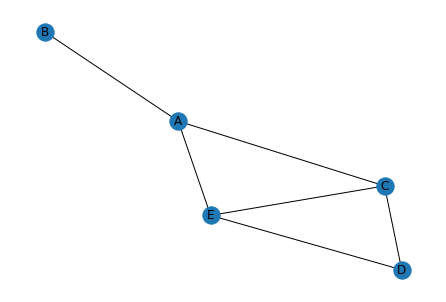

In [2]:
# Run this cell
G = nx.Graph()
G.add_nodes_from('ABCDE')
G.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'D'), ('D', 'E'), ('C', 'E'), ('A', 'E')])
nx.draw(G, with_labels=True)

**1.1**

Name a node in this graph

In [3]:
# Answer here

**1.2**

Name an edge in this graph

In [4]:
# Answer here

**1.3**

How many edges are there in the graph?

In [5]:
# Answer here

**1.4**

How many nodes are there in the graph?

In [6]:
# Answer here

**1.5**

Run the following to verify your answer to 1.3 and 1.4

In [7]:
# The solution to 1.4 and 1.5
print(f'There are {G.number_of_edges()} edges and {G.number_of_nodes()} nodes in graph G.')

There are 6 edges and 5 nodes in graph G.


## Question 2: More definitions


Here are some more definitions:
>1. The **neighbors** of a node are all the nodes that directly connected to that node.
>2. The **degree** of a node is the number of **neighbors**
>3. A **cycle** is a `list` (or path) of edges that begin and end at the same vertex.
 
_Note: Sometimes a node will have an edge that connects directly to itself. This means the node is its own neighbor! We will ignore such cases._

**2.1**

Run the following to generate a graph

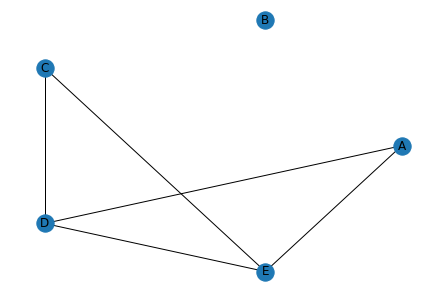

In [8]:
# Run this cell
G = nx.Graph()
G.add_nodes_from('ABCDE')
G.add_edges_from([ ('A', 'D'), ('C', 'D'), ('D', 'E'), ('C', 'E'), ('A', 'E')])
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)

**2.2**

Name one neighbor of node `A`.

In [9]:
# Answer here

**2.3**

What is the degree of node `E`?

In [10]:
# Answer here

**2.4**

What is the degree of node `B`?


In [11]:
# Answer here

**2.5**

Can you name one **cycle** in the graph? 


In [12]:
# Give a path of nodes that form a cycle

**2.6**

Run the next cell to check your answers to 2.2, 2.3, 2.4. 2.5

In [13]:
print(f'Node A has degree {len(G["A"])} and neighbors: {list(G["A"])}')
print(f'Node E has degree {len(G["E"])} and neighbors: {list(G["E"])}')
print(f'Node B has degree {len(G["B"])} and neighbors: {list(G["B"])}')
print(f'Example Cycle: {nx.find_cycle(G)}')

Node A has degree 2 and neighbors: ['D', 'E']
Node E has degree 3 and neighbors: ['D', 'C', 'A']
Node B has degree 0 and neighbors: []
Example Cycle: [('D', 'C'), ('C', 'E'), ('E', 'D')]


## Question 3: More More Definitions

Here are many different properties of graphs:

* **undirected vs directed**: 
    >1. **undirected**: this means edges are symmetric. `e = (A, B)` means you can use `e` to go from node `A` to node `B` and you can use `e` to go from node `B` to node `A`.
    >2. **directed**: this means that each edge has a direction. `e = (A, B)` means you can use `e` only to go from `A` to `B`. This means that each node will have an **indegree** (the number of edges that lead into the node) and an **outdegree** (the number of edges that lead out of the node).
* **unweighted vs weighted**: 
    >1. **unweighted**: edges are either there or not.  
    >2. **weighted**: edges have a weight that captures the relationship between two nodes.
* **cyclic vs acyclic**:
    >1. **cyclic**: means the graph has a cycle
    >2. **acyclic**: means the graph does not have a cycle




**3.1**

Run the following code to generate a graph

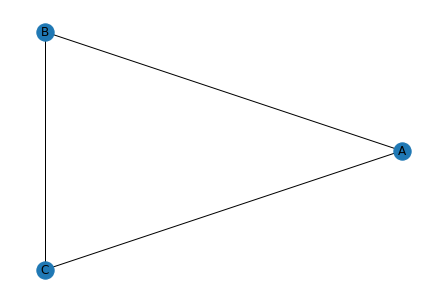

In [14]:
# Run this cell
G = nx.Graph()
G.add_nodes_from('ABC')
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C')])
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)

**3.2**

Is the graph directed? Is the graph weighted? Is the graph cyclic?

In [15]:
# Your answers here.

**3.3**

Run this to check your answers

In [16]:
print(f'Is G directed? {nx.is_directed(G)}')
print(f'Is G weighted? {nx.is_weighted(G)}')
# Will throw error if acyclic
print(f'Is G cyclic? Cycle: {nx.find_cycle(G)}')

Is G directed? False
Is G weighted? False
Is G cyclic? Cycle: [('A', 'B'), ('B', 'C'), ('C', 'A')]


**3.4**

Run the following code to generate a graph

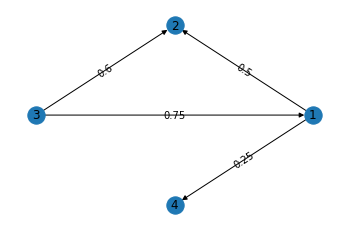

In [17]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (3, 2, 0.6), (1, 4, 0.25)])
pos = nx.circular_layout(DG)
nx.draw_networkx_edge_labels(DG, pos, nx.get_edge_attributes(DG, "weight"))
nx.draw(DG, with_labels=True, pos=pos)

**3.5**

Is the graph directed? Is the graph weighted? Is the graph cyclic?

In [18]:
# Your answers here.

**3.6**

Run this to check your answers

In [19]:
print(f'Is G directed? {nx.is_directed(DG)}')
print(f'Is G weighted? {nx.is_weighted(DG)}')
# Will throw error if acyclic
print(f'Is G cyclic? Cycles: {list(nx.simple_cycles(DG))}')

Is G directed? True
Is G weighted? True
Is G cyclic? Cycles: []


**3.7**

Give a short real life example of when you might need a directed graph instead of an undirected graph. (For instance, one example could be Instagram where node/person `A` might follow node/person `B`, but node/person `B` might not follow node/person `A`)

In [20]:
# A few word here, doesn't need to be full sentences

**3.8**

Give an example where you might need a weighted graph instead of an unweighted one. (For instance, one example could be if the graph represents roads, you might need to keep track of road lengths).

In [21]:
# A few words here, doesn't need to be full sentences

## Question 4: Representation

Recall that you can represent a graph in two ways:
* An **adjaceny list** that records a list of neighbors for each node
* and an **adjacency matrix** that records whether or not there is an edge in a matrix. If `matrix[row][col] == 1`, then there is an edge from node represented by `row` to the node represented by `col`

**4.1**

Run the following cell to generate a graph

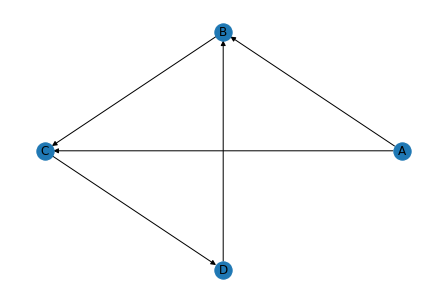

In [22]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'D'), ('B', 'C'), ('D', 'B')])
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)

**4.2**

Generate the `4x4` adjency matrix representation of the graph by hand

In [23]:
# Your answer here

# A = 0, B = 1, C = 2, D = 3. 
# Then adj[row][col] == 1 means there is an edge from node row to node col

adj = [[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]]

**4.3**

Check your answer to 4.2 in the cell below

In [24]:
# A = 0, B = 1, C = 2, D = 3. 
# Then adj[row][col] == 1 means there is an edge from node row to node col


print(nx.adjacency_matrix(G).toarray())

[[0 1 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]]


**4.4**

Generate the adjacency list representation of the graph by hand

In [25]:
# 

**4.5**

Check your answer to 4.4 in the cell below

In [26]:
# There are a number of cool things we can do:

# (1) nx.to_dict_of_dicts(G) OR nx.to_dict_of_lists
print(f'Adjaceny list: {nx.to_dict_of_lists(G)}')
print()
# (2) nx.generate_adjlist(G) 
lines = [x[0] + '->' + x[1:] for x in nx.generate_adjlist(G)]
for line in lines:
    print(line)
print()
# (3) G.adj
print(f'Adjacency list: {G.adj}')

# If you have anything like any of these answers, you are correct!

Adjaceny list: {'A': ['B', 'C'], 'B': ['C'], 'C': ['D'], 'D': ['B']}

A-> B C
B-> C
C-> D
D-> B

Adjacency list: {'A': {'B': {}, 'C': {}}, 'B': {'C': {}}, 'C': {'D': {}}, 'D': {'B': {}}}


## Question 5: get_neighbors()

### 5.1

Write a function that takes in a graph `G` and a node `n`, and `return`s a list of all the neighbors of `n`. If `n` has no neighbors, `return` the empty list `[]`.

_Hint: The format of `G` is confusing, so try printing `G` out! `G` is a dictionary where each node is a key. The value for a key (which is a node) is the list of neighbors reachable from that key_

In [27]:
def get_neighbors(G, n):
    """ returns the list of neighbors of node n in graph G
    Inputs: 
        G: The graph
            type: dict{list[string or int]}
        n: The node
            type: string or int
    Returns: The list of neighbors
            type: list[string or int]
    """
    return []


The graph G is: {'A': ['B', 'C'], 'B': ['A', 'C'], 'C': ['B', 'A', 'D'], 'D': ['C'], 'E': []}


------ Test case failed. -------

  Want: {'C', 'B'} (type: set)
  Got:  set() (type: set)

--------------------------------


--------- Test case failed. ---------

  Want: {'D', 'B', 'A'} (type: set)
  Got:  set() (type: set)

-------------------------------------

Test case passed.


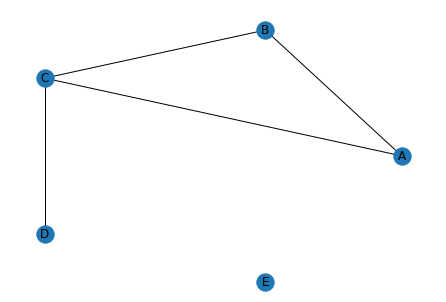

In [28]:
# Test cases:
G = nx.Graph()
G.add_nodes_from('ABCDE')
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C'), ('C', 'D')])
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
graph = nx.to_dict_of_lists(G)

print(f'The graph G is: {graph}')
print()
assert_equal(want=set(['B', 'C']), got=set(get_neighbors(graph, 'A')))
assert_equal(want=set(['A', 'B', 'D']), got=set(get_neighbors(graph, 'C')))
assert_equal(want=set([]) , got=set(get_neighbors(graph, 'E')))

### 5.2 

You are given a graph and two nodes `n1` and `n2`. Check if there is a edge from `n1` to `n2`.

In [29]:
def is_neighboring(G, n1, n2):
    """ returns True if there is an edge from n1 to n2 in G
    Inputs: 
        G: The graph
            type: dict{list[string or int]}
        n1: A node
            type: string or int
        n2: Another node
            type: string or int
    Returns:
            type: bool
    """
    return False


The graph G is: {'A': ['B', 'C'], 'B': ['A', 'C'], 'C': ['B', 'A', 'D'], 'D': ['C'], 'E': []}

Test case passed.

------ Test case failed. -------

  Want: True (type: bool)
  Got:  False (type: bool)

--------------------------------

Test case passed.

------ Test case failed. -------

  Want: True (type: bool)
  Got:  False (type: bool)

--------------------------------



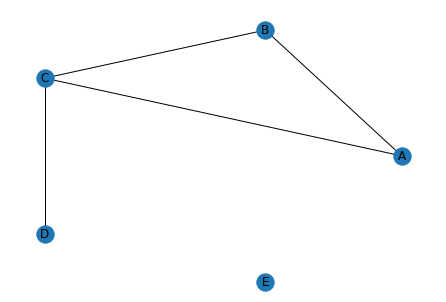

In [30]:
# Test cases:
G = nx.Graph()
G.add_nodes_from('ABCDE')
G.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C'), ('C', 'D')])
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
graph = nx.to_dict_of_lists(G)

print(f'The graph G is: {graph}')
print()

assert_equal(want=False, got=is_neighboring(graph, 'A', 'D'))
assert_equal(want=True , got=is_neighboring(graph, 'C', 'D'))
assert_equal(want=False,got=is_neighboring(graph, 'E', 'B'))
assert_equal(want=True, got=is_neighboring(graph, 'C', 'B'))

### 5.3

You are given a graph and two nodes `n1` and `n2`. Check if there is an path of length `2` or less that starts from `n1` and ends at `n2.

For example in the graph above, `D -> C -> A` is a path of length `2`, so `path_2(G, 'D', 'A')` should return `True`. `D -> C` is a path with one edge, so `path_2(G, 'D', 'C')` should also return `True`. There is no path to `E`, so `path_2(G, 'C', 'E')` should return `False`.

_Hint: It may save some time if you use is_neighboring() in your code!_


In [31]:
def path_2(G, n1, n2):
    """ returns True if there is a path of length 2 or smaller from n1 to n2 in G
    Inputs: 
        G: The graph
            type: dict{list[string or int]}
        n1: A node
            type: string or int
        n2: Another node
            type: string or int
    Returns:
            type: bool
    """
    return False



The graph G is: {0: [], 1: [], 2: [4], 3: [5, 7, 9], 4: [6, 8], 5: [7, 9], 6: [8], 7: [9], 8: [], 9: []}

Test case passed.
Test case passed.

------ Test case failed. -------

  Want: True (type: bool)
  Got:  False (type: bool)

--------------------------------

Test case passed.

------ Test case failed. -------

  Want: True (type: bool)
  Got:  False (type: bool)

--------------------------------


------ Test case failed. -------

  Want: True (type: bool)
  Got:  False (type: bool)

--------------------------------

Test case passed.


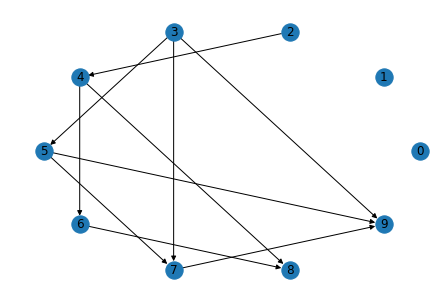

In [32]:
# Test cases:
G = nx.DiGraph()
n = 10
G.add_nodes_from(range(n))
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if j <= i ** 2 and j % 2 == i % 2:
            edges.append((i, j))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
graph = nx.to_dict_of_lists(G)
print(f'The graph G is: {graph}')
print()

assert_equal(want=False, got=path_2(graph, 1, 4))
assert_equal(want=False, got=path_2(graph, 7, 3))
assert_equal(want=True, got=path_2(graph, 3, 7))
assert_equal(want=False, got=path_2(graph, 2, 8))
assert_equal(want=True, got=path_2(graph, 4, 6))
assert_equal(want=True, got=path_2(graph, 2, 6))
assert_equal(want=False, got=path_2(graph, 8, 1))

## Question 6: is_connected() - **challenge**



Write a function to check if there is a path from node `n1` to node `n2` in `G`.

_Hint: Either this lecture or next lecture we will show an `O(n)` algorithm to do this called Depth First Search. If we have not covered this yet, feel free to read up on it [here](https://favtutor.com/blogs/depth-first-search-python)._

_Hint-2: If we haven't learned DFS, we can do inefficient algorithms as well! For example, we can try all paths of length `|V|` where `|V|` is the number of nodes in the graph. Alternatively, we've coded `path_2()`. Can you code `path_4()`? Can you code `path_8()`? Can you code `path_n()?`_

In [33]:
def is_connected(G, n1, n2):
    """ returns True if there is a path from n1 to n2 in G
    Inputs: 
        G: The graph
            type: dict{list[string or int]}
        n1: A node
            type: string or int
        n2: Another node
            type: string or int
    Returns:
            type: bool
    """
    return False

The graph G is: {0: [], 1: [], 2: [4], 3: [5, 7, 9], 4: [6, 8], 5: [7, 9], 6: [8], 7: [9], 8: [], 9: []}

Test case passed.
Test case passed.

------ Test case failed. -------

  Want: False (type: bool)
  Got:  True (type: bool)

--------------------------------


------ Test case failed. -------

  Want: False (type: bool)
  Got:  True (type: bool)

--------------------------------


------ Test case failed. -------

  Want: False (type: bool)
  Got:  True (type: bool)

--------------------------------


------ Test case failed. -------

  Want: False (type: bool)
  Got:  True (type: bool)

--------------------------------

Test case passed.


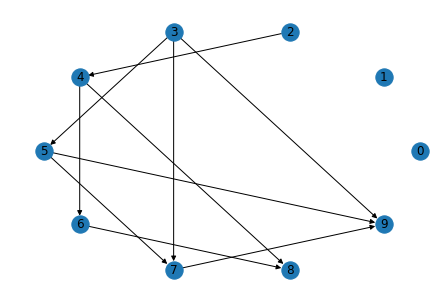

In [34]:
# Run below to test your code

# Staff solution (BFS, something we have not learned)
from collections import deque
def staff_solution(G, n1, n2):
    visited = set()
    q = deque()
    q.append(n1)
    while len(q) > 0:
        node = q.popleft()
        for neighbor in G[node]:
            if neighbor not in visited:
                q.append(neighbor)
        visited.add(node)
        if node == n2:
            return True
    return False

# Graph:
G = nx.DiGraph()
n = 10
G.add_nodes_from(range(n))
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if j <= i ** 2 and j % 2 == i % 2:
            edges.append((i, j))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
graph = nx.to_dict_of_lists(G)

# Test cases:
print(f'The graph G is: {graph}')
print()

assert_equal(want=is_connected(graph, 1, 4), got=staff_solution(graph, 1, 4))
assert_equal(want=is_connected(graph, 7, 3), got=staff_solution(graph, 7, 3))
assert_equal(want=is_connected(graph, 3, 7), got=staff_solution(graph, 3, 7))
assert_equal(want=is_connected(graph, 2, 8), got=staff_solution(graph, 2, 8))
assert_equal(want=is_connected(graph, 4, 6), got=staff_solution(graph, 4, 6))
assert_equal(want=is_connected(graph, 2, 6), got=staff_solution(graph, 2, 6))
assert_equal(want=is_connected(graph, 8, 1), got=staff_solution(graph, 8, 1))

##Question 7: Word Questions

How many edges are there in a **fully connected** graph with `n` nodes? That is, if you have `n` nodes, what is the maximum number of unique edges between two distinct nodes you can have? 

In [35]:
# Answer here

What if the graph is **directed**? Then what is the maximum number of edges?

In [36]:
# Answer here

Why might you be able to think of an undirected graph as a special case of a directed graph?

In [37]:
# Answer here

## If you finish early, you can go back to earlier problems, or try `probs_9c.ipynb`